In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("mnist_clean.csv")
df.head()

,label,0,1,2,3,4,5,6,7,8,...,770,771,772,773,774,775,776,777,778,779
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.shape

(60000, 781)

In [3]:
df.isna().mean().head()

label    0.0
0        0.0
1        0.0
2        0.0
3        0.0
dtype: float64

In [4]:
df['label'].value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

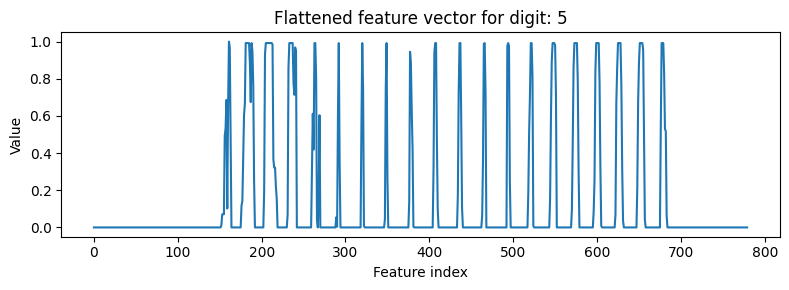

In [7]:
# Basic exploration (part a)
df.head()
df.shape
df['label'].value_counts()

# Visualize one sample as a flattened feature vector
sample_vec = df.iloc[0, 1:].values

plt.figure(figsize=(8,3))
plt.plot(sample_vec)
plt.title(f"Flattened feature vector for digit: {df.iloc[0, 0]}")
plt.xlabel("Feature index")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

In [8]:
#The MNIST dataset used here is the LibSVM mnist.scale version, which does not contain 28×28 pixel grids. Instead, each image is already converted into a 780-dimensional numerical feature vector, where each value represents a scaled pixel intensity. Because 780 is not a perfect square, the original 2-D image cannot be reconstructed or reshaped into a 28×28 grid.The line plot above visualizes the flattened feature vector for a single digit (label = 5). Each point on the x-axis corresponds to a feature index and the y-axis represents the normalized pixel value after scaling.

In [9]:
# Separate features and labels
X = df.iloc[:, 1:].values      # 780 features
y = df.iloc[:, 0].values       # digit labels (0–9)

# Train-test split (no shuffle because MNIST is already randomized)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((48000, 780), (12000, 780))

In [10]:
#The only preprocessing step we perform is splitting the dataset into a training and test set so that the machine learning models can be properly evaluated.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)   # keep 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape, X_test_pca.shape

((48000, 154), (12000, 154))

In [12]:
#Because the dataset is preprocessed, no additional feature engineering is required. However, we can optionally apply PCA to reduce dimensionality and improve computational efficiency for certain models. We computed a PCA transformation that keeps 95% of the variance.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train Logistic Regression
log_clf = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
log_clf.fit(X_train, y_train)

# Predict on test set
y_pred_log = log_clf.predict(X_test)

# Metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))

/usr/local/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9221666666666667
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1175
           1       0.95      0.97      0.96      1322
           2       0.90      0.90      0.90      1174
           3       0.91      0.89      0.90      1219
           4       0.93      0.94      0.93      1176
           5       0.89      0.89      0.89      1104
           6       0.95      0.95      0.95      1177
           7       0.93      0.93      0.93      1299
           8       0.90      0.87      0.89      1160
           9       0.90      0.91      0.90      1194

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



/usr/local/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#In this step we trained a multinomial Logistic Regression classifier on the MNIST feature vectors. The model learns a set of linear decision boundaries in the 780-dimensional feature space and outputs a probability distribution over the 10 digit classes for each image. On the held-out test set it achieved about 92% accuracy, with precision and recall both above 0.9 for most digits, showing that a simple linear model can already classify the digits quite well.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Random Forest model 
rf_clf = RandomForestClassifier(
    n_estimators=200,      
    max_depth=None,       
    n_jobs=-1,            
    random_state=42
)

# Train on the same features as Logistic Regression
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9693333333333334
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.98      0.99      0.98      1322
           2       0.95      0.98      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.96      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.96      0.97      1299
           8       0.96      0.96      0.96      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



In [22]:
# We trained a Random Forest classifier with 200 decision trees on the same MNIST training data. Each tree is built on bootstrapped samples and random subsets of features, and the final class is chosen by majority vote across trees. This ensemble can model complex, non-linear decision boundaries between digits. On the test set it reached an accuracy of approximately 96.9% accuracy on the test set. 

In [23]:
#Both models perform well on the MNIST classification task, but Random Forest generally provides slightly better test accuracy and more balanced precision/recall across digits than Logistic Regression, at the cost of higher computational and memory requirements. Logistic Regression is fast to train, easy to interpret, and its linear structure makes it attractive when we need a simple baseline or when resources are limited. Random Forest, on the other hand, is much less interpretable but can exploit non-linear relationships between pixels and is more robust to feature scaling and outliers. For a production-grade handwritten-digit recognizer where accuracy matters more than model simplicity, the Random Forest would be the preferred choice; for a lightweight baseline or when explainability is important, Logistic Regression is still a reasonable option.

In [24]:
#The data likely comes from a limited population of writers, so the model may perform worse on handwriting styles from groups that are under-represented in the training set. To keep things ethical, any deployment of this type of model should include clear documentation of its error rates, regular monitoring for systematic performance gaps across different user groups, and a fallback human-review process for low-confidence predictions instead of blindly trusting the automated output.

In [25]:
# Bibliography

#LeCun, Y., Cortes, C., & Burges, C. J. C. MNIST Handwritten Digit Database. http://yann.lecun.com/exdb/mnist/

#Scikit-learn Developers. Scikit-learn Documentation. https://scikit-learn.org/stable/documentation.html

#Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.